# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
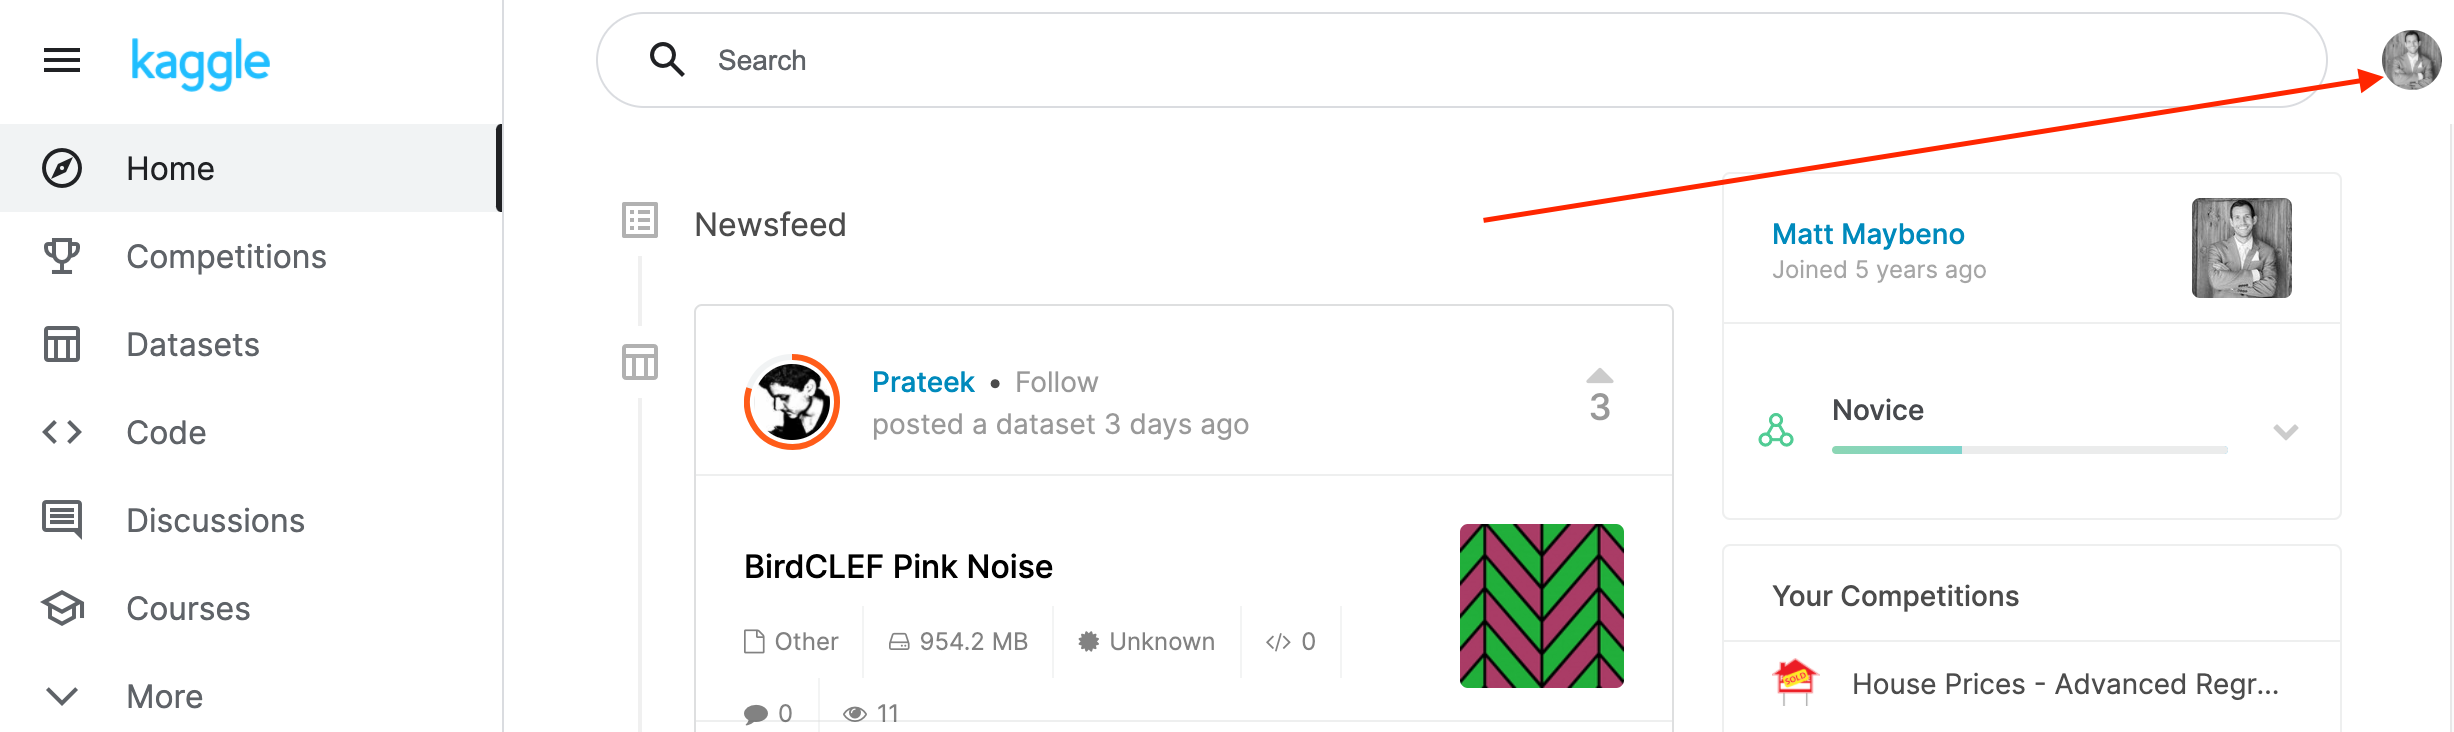
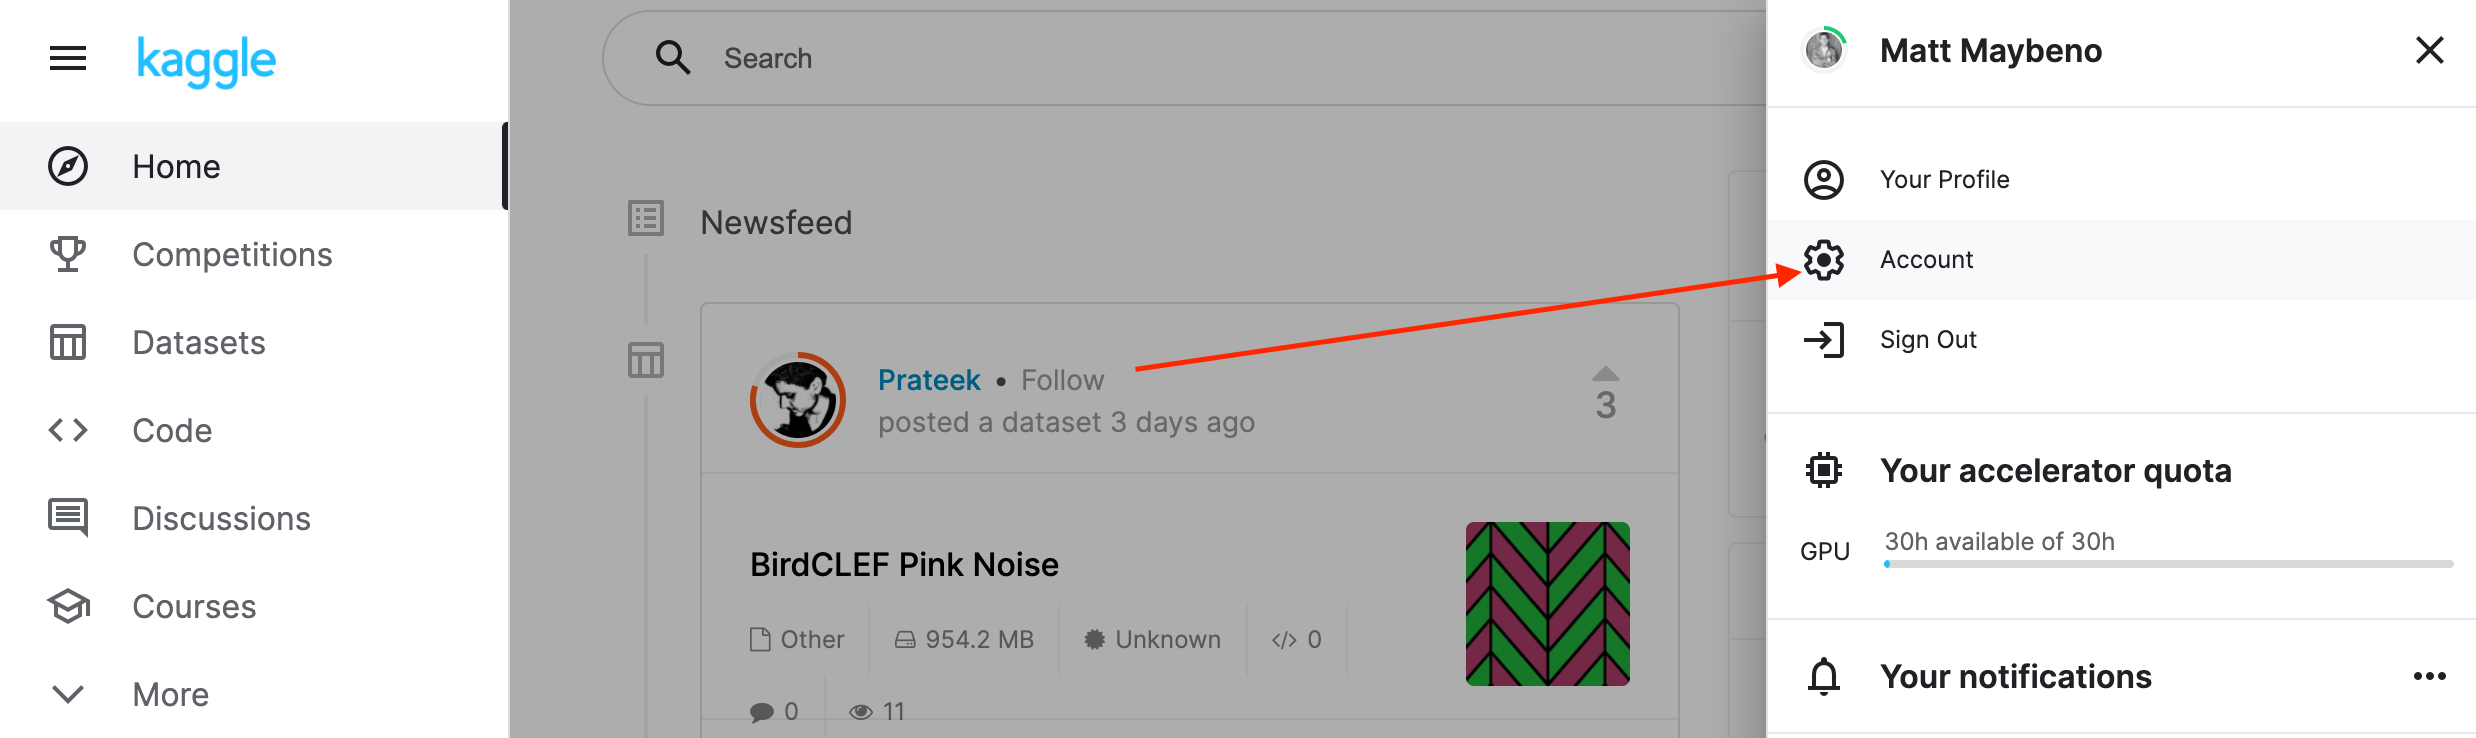
2. Scroll down to API and click Create New API Token.
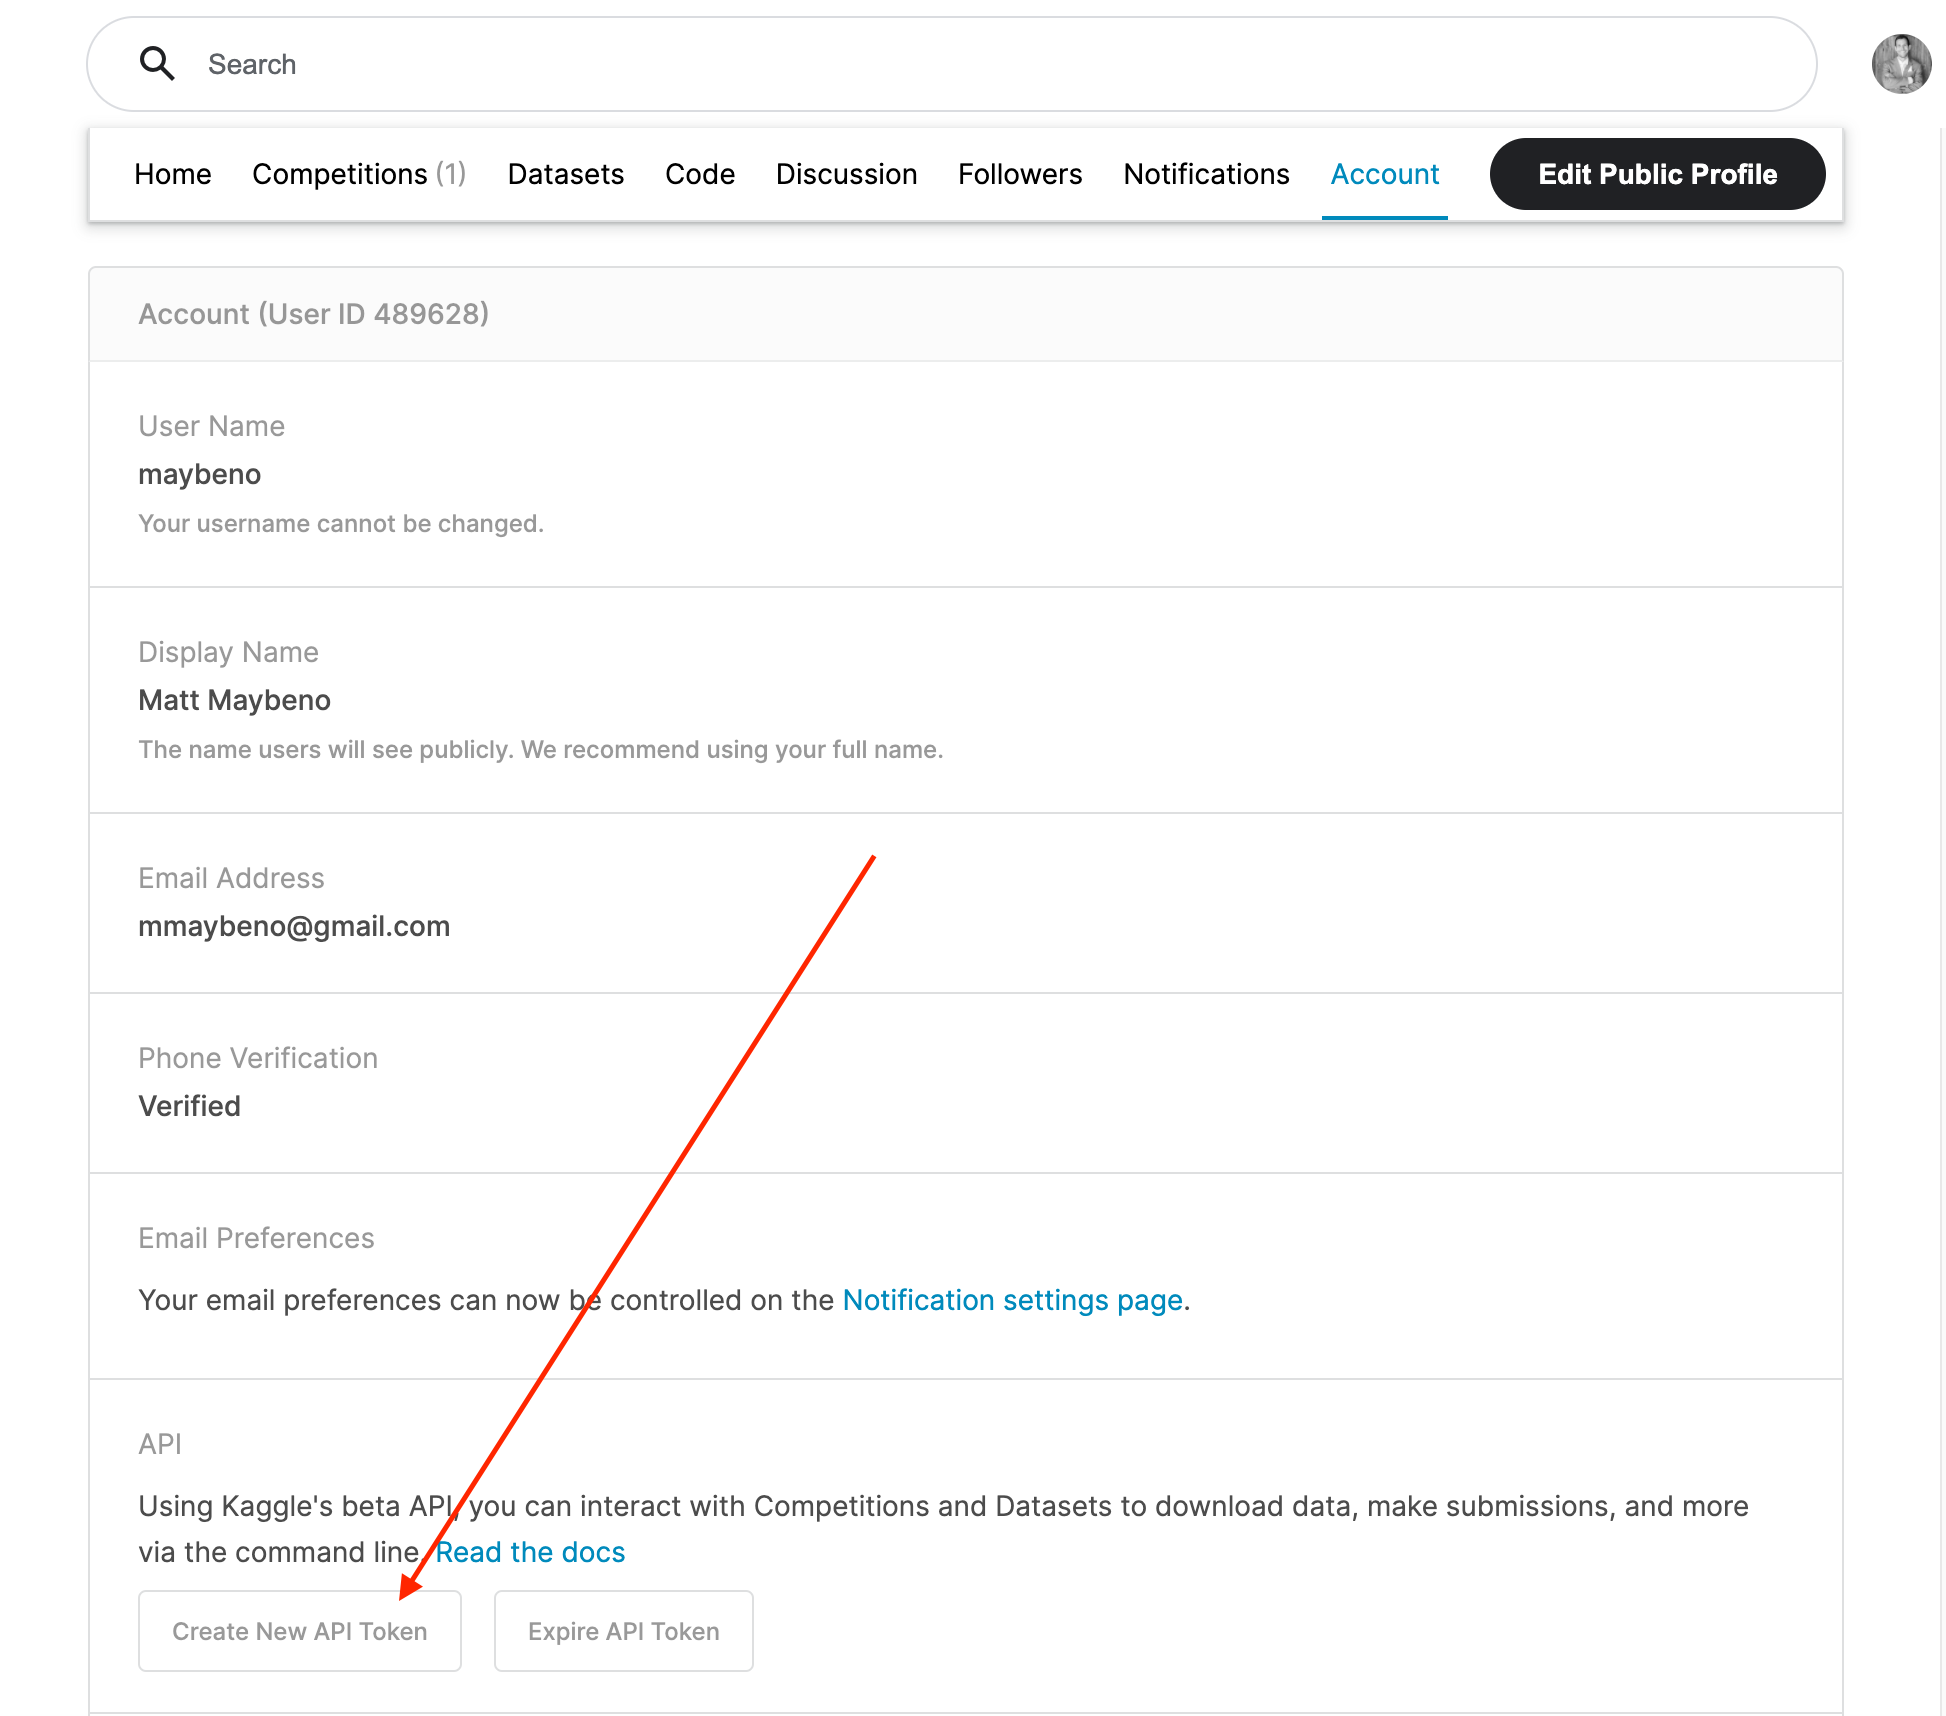
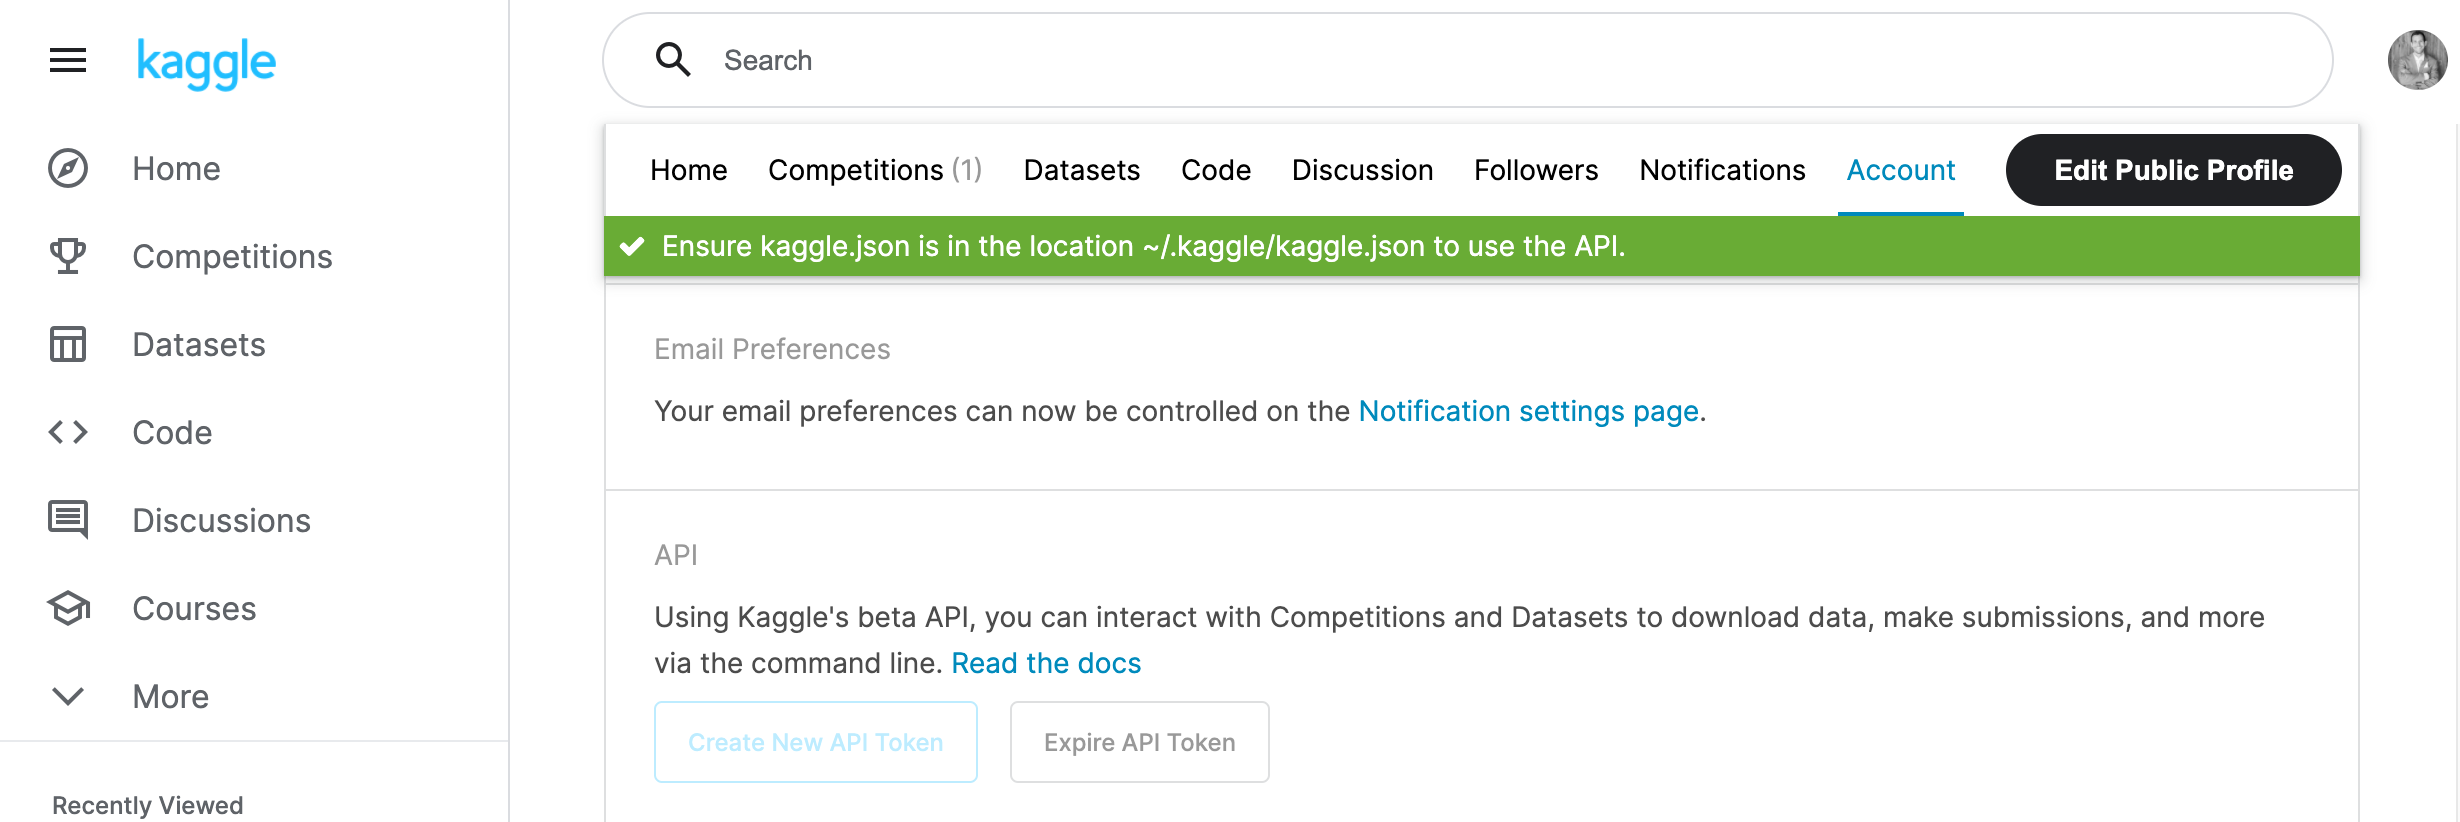
3. Open up `kaggle.json` and use the username and key.
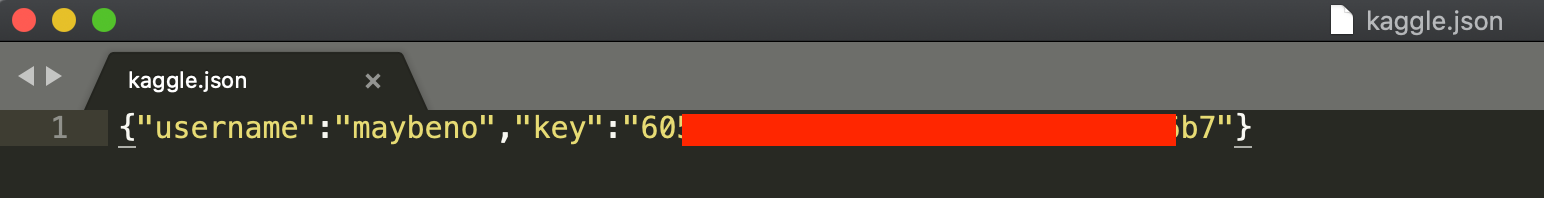

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 80.1.0
    Uninstalling setuptools-80.1.0:
      Successfully uninstalled setuptools-80.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dash 2.18.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.18.1 requires dash-table==5.0.0, which is not installed.
dash 2.18.1 requires Flask<3.1,>=1.0.4, but you have flask 3.1.

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle --upgrade --quiet

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
import os

kaggle_token = {
    "username": "anoudalfaydi",
    "key": "e568cb9435186ad89c0341008a20f194"
}
# Save API token the kaggle.json file
# Use home directory instead of /root
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

with open(os.path.join(kaggle_dir, "kaggle.json"), "w") as f:
    json.dump(kaggle_token, f)

os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
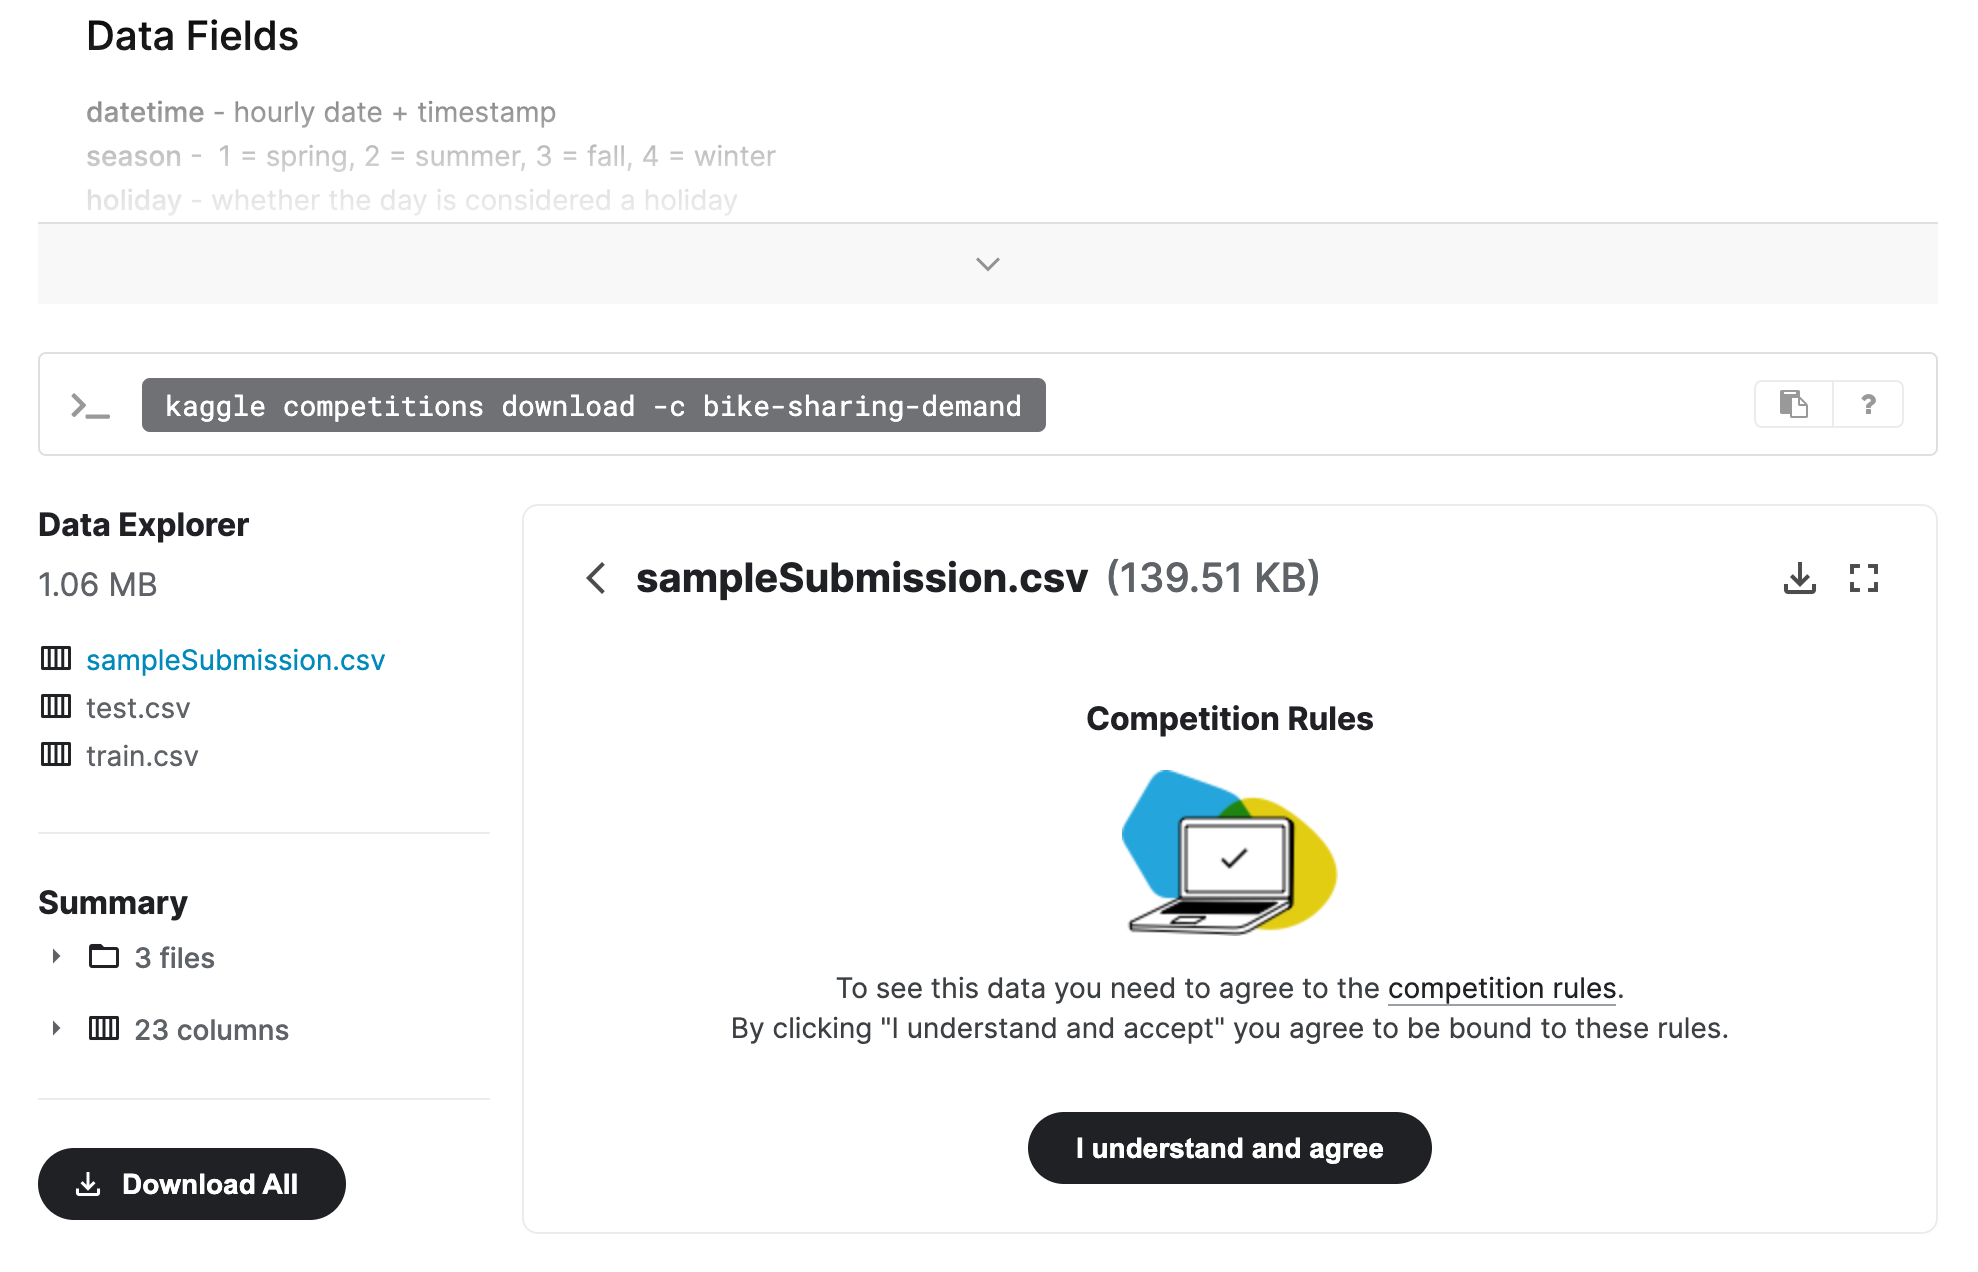

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand


bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [8]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
# Load the training dataset and parse the 'datetime' column
import pandas as pd
train = pd.read_csv("train.csv", parse_dates=["datetime"])

# Display the first few rows
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
# Info about data types and non-null counts
train.info()

# Statistical summary of numerical features
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
# Load the test dataset and parse the 'datetime' column
test = pd.read_csv("test.csv", parse_dates=["datetime"])

# Display the first few rows
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
# Load the sample submission file
submission = pd.read_csv("sampleSubmission.csv")

# Display the first few rows
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
# Define parameters
from autogluon.tabular import TabularPredictor
label = 'count'
ignored_columns = ['casual', 'registered']
eval_metric = 'root_mean_squared_error'
time_limit = 600  # 10 minutes
presets = 'best_quality'

# Train the model
predictor = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric=eval_metric,
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets
)

No path specified. Models will be saved in: "AutogluonModels/ag-20250528_193830"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       2.05 GB / 3.76 GB (54.5%)
Disk Space Avail:   2.97 GB / 4.99 GB (59.5%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

(_ray_fit pid=497) [1000]	valid_set's rmse: 129.692


(_dystack pid=363) WARNING: All log messages before absl::InitializeLog() is called are written to STDERR
(_dystack pid=363) I0000 00:00:1748461129.434980     416 chttp2_transport.cc:1182] ipv4:169.255.255.2:44701: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2, created_time:"2025-05-28T19:38:49.433578684+00:00"}


(_ray_fit pid=617) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=649) [2000]	valid_set's rmse: 126.702 [repeated 2x across cluster]
(_ray_fit pid=682) [2000]	valid_set's rmse: 134.443 [repeated 5x across cluster]
(_ray_fit pid=649) [9000]	valid_set's rmse: 125.618 [repeated 7x across cluster]
(_ray_fit pid=682) [9000]	valid_set's rmse: 132.422 [repeated 4x across cluster]


(_dystack pid=363) I0000 00:00:1748461162.820617     416 chttp2_transport.cc:1182] ipv4:169.255.255.2:45251: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2, created_time:"2025-05-28T19:39:22.820614214+00:00"}


(_ray_fit pid=722) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=722) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=722) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=722) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=756) [2000]	valid_set's rmse: 138.865 [repeated 3x across cluster]


(_dystack pid=363) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=363) 	59.78s	 = Training   runtime
(_dystack pid=363) 	8.33s	 = Validation runtime
(_dystack pid=363) Fitting model: LightGBM_BAG_L1 ... Training model for up to 27.57s of the 75.67s of remaining time.
(_dystack pid=363) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.53%)


(_ray_fit pid=795) [1000]	valid_set's rmse: 129.274 [repeated 7x across cluster]
(_ray_fit pid=871) [1000]	valid_set's rmse: 135.098 [repeated 2x across cluster]
(_ray_fit pid=937) [1000]	valid_set's rmse: 124.896
(_ray_fit pid=939) [1000]	valid_set's rmse: 134.058
(_ray_fit pid=1006) [1000]	valid_set's rmse: 134.479
(_ray_fit pid=1035) [1000]	valid_set's rmse: 136.511


(_dystack pid=363) I0000 00:00:1748461217.180587     411 chttp2_transport.cc:1182] ipv4:169.255.255.2:34199: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {grpc_status:14, http2_error:2, created_time:"2025-05-28T19:40:17.180584373+00:00"}
(_dystack pid=363) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=363) 	27.59s	 = Training   runtime
(_dystack pid=363) 	1.27s	 = Validation runtime
(_dystack pid=363) Fitting model: WeightedEnsemble_L2 ... Training model for up to 144.26s of the 44.59s of remaining time.
(_dystack pid=363) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=363) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=363) 	0.01s	 = Training   runtime
(_dystack pid=363) 	0.0s	 = Validation runtime
(_dystack pid=363) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=363) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 44.57s of the 44

(_ray_fit pid=1073) [1000]	valid_set's rmse: 68.8067
(_ray_fit pid=1074) [1000]	valid_set's rmse: 69.9415
(_ray_fit pid=1170) [1000]	valid_set's rmse: 72.9773
(_ray_fit pid=1139) [1000]	valid_set's rmse: 78.2341
(_ray_fit pid=1208) [1000]	valid_set's rmse: 75.8581
(_ray_fit pid=1237) [1000]	valid_set's rmse: 76.948
(_ray_fit pid=1272) [1000]	valid_set's rmse: 71.9787
(_ray_fit pid=1302) [1000]	valid_set's rmse: 75.9102
(_ray_fit pid=1302) [2000]	valid_set's rmse: 75.2777


(_dystack pid=363) 	-73.6831	 = Validation score   (-root_mean_squared_error)
(_dystack pid=363) 	33.96s	 = Training   runtime
(_dystack pid=363) 	1.91s	 = Validation runtime
(_dystack pid=363) Fitting model: LightGBM_BAG_L2 ... Training model for up to 6.43s of the 6.42s of remaining time.
(_dystack pid=363) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.62%)
(_ray_fit pid=1352) 	Ran out of time, early stopping on iteration 365. Best iteration is:
(_ray_fit pid=1352) 	[204]	valid_set's rmse: 63.4345
(_ray_fit pid=1427) 	Ran out of time, early stopping on iteration 511. Best iteration is:
(_ray_fit pid=1427) 	[225]	valid_set's rmse: 69.1472
(_ray_fit pid=1497) 	Ran out of time, early stopping on iteration 308. Best iteration is:
(_ray_fit pid=1497) 	[141]	valid_set's rmse: 70.4637
(_dystack pid=363) 	-67.7201	 = Validation score   (-root_mean_squared_error)
(_dystack pid=363) 	21.87s	 = Training   runtime


### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.096159  root_mean_squared_error      17.055404  401.867438                0.000586           0.032687            3       True         13
1   RandomForestMSE_BAG_L2  -53.362732  root_mean_squared_error      12.903444  325.788699                0.663187          39.790738            2       True         12
2          LightGBM_BAG_L2  -55.130105  root_mean_squared_error      12.433547  310.804042                0.193290          24.806081            2       True         11
3        LightGBMXT_BAG_L2  -60.506404  root_mean_squared_error      16.198341  337.237932                3.958084          51.239972            2       True         10
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.050881    0.034994   

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.70351100244875

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)
predictions.head()

/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

0    22.866718
1    41.818546
2    45.037521
3    49.252975
4    52.044395
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.553787
std        89.855888
min         3.090255
25%        20.357685
50%        62.977909
75%       166.719971
max       367.725769
Name: count, dtype: float64

In [16]:
# How many negative values do we have?
# Count how many predictions are negative
pred_neg_count = (predictions < 0).sum()
pred_pos_count = (predictions >= 0).sum()

print("Total predictions                :", len(predictions))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [17]:
# Set them to zero
# Set negative predictions to zero
predictions[predictions < 0] = 0

# Verify no negative predictions remain
pred_neg_count = (predictions < 0).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")


No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [19]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 705kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [20]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv               2025-05-28 19:50:37.010000  first raw submission  SubmissionStatus.COMPLETE  1.79981      1.79981       


#### Initial score of `1.79981      `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

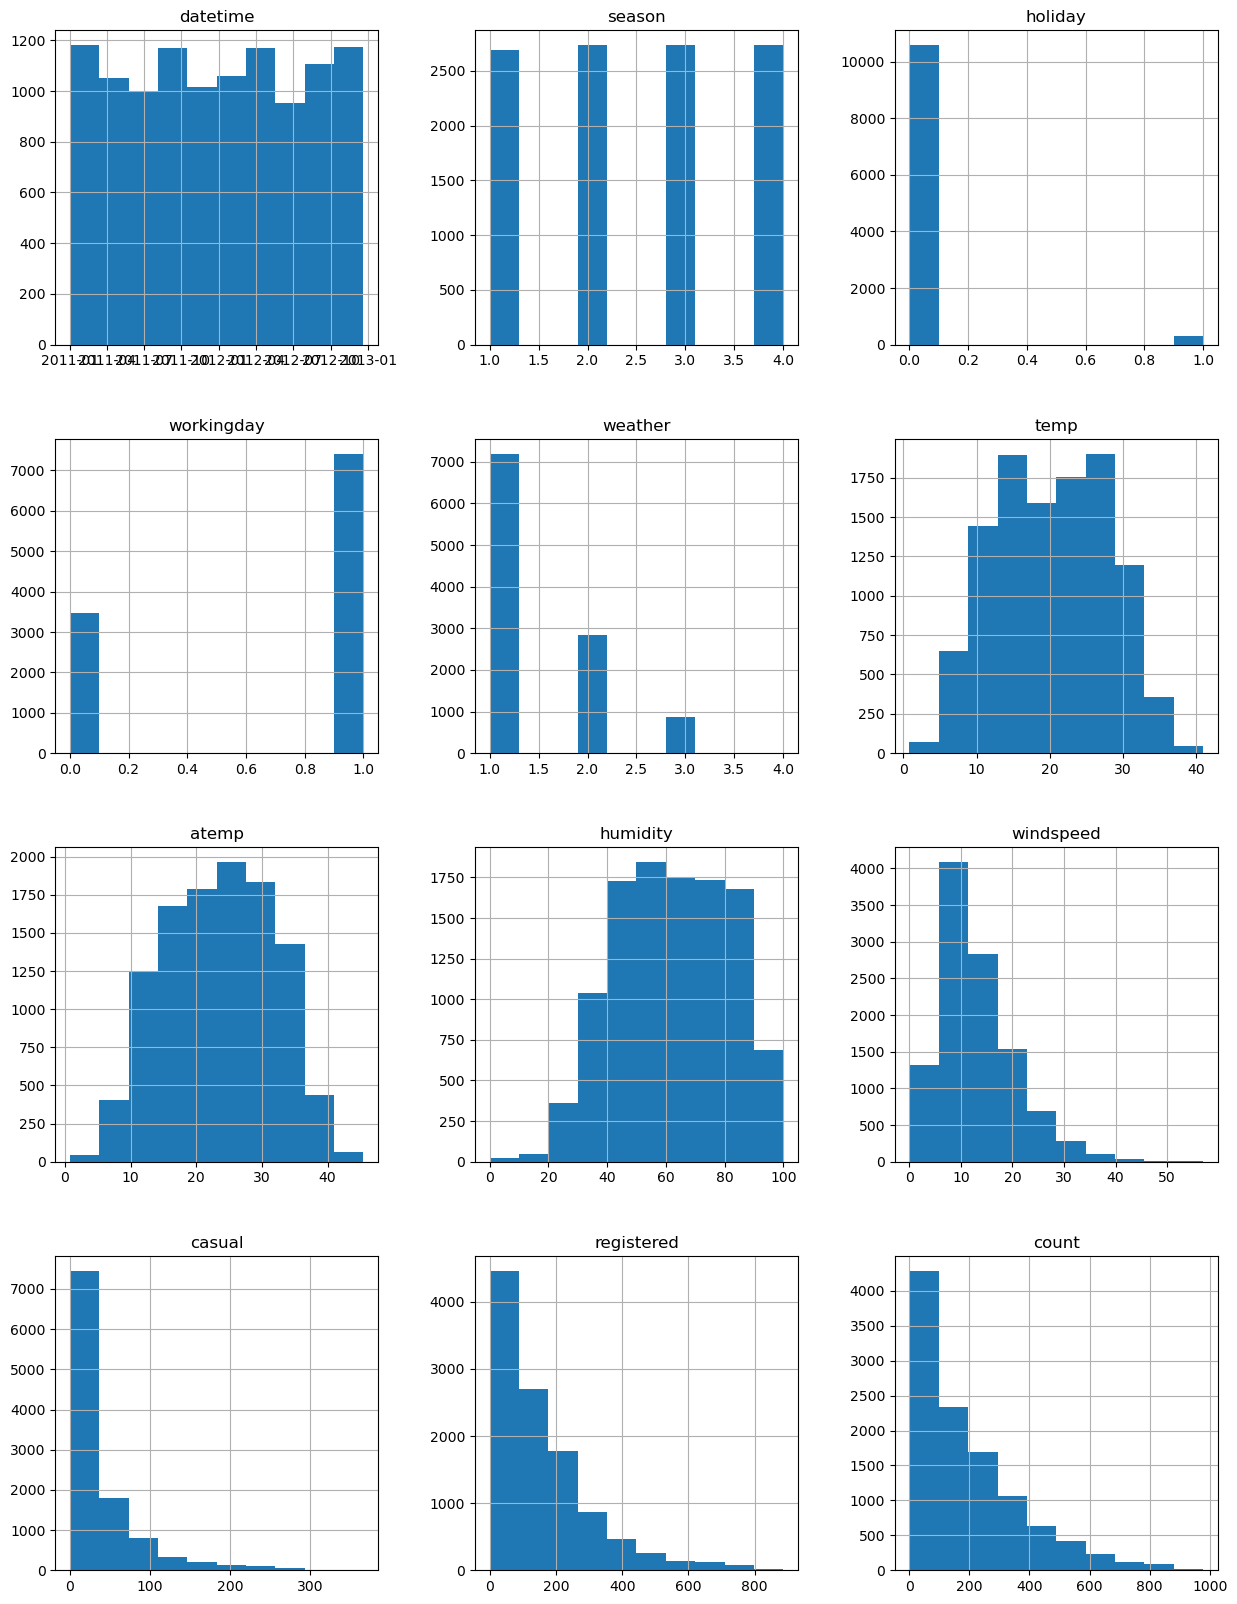

In [21]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis

train.hist(figsize=(15,20))  


In [22]:
# create a new feature
for df in [train, test]:
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [23]:
for df in [train, test]:
    df['season'] = df['season'].astype('category')
    df['weather'] = df['weather'].astype('category')

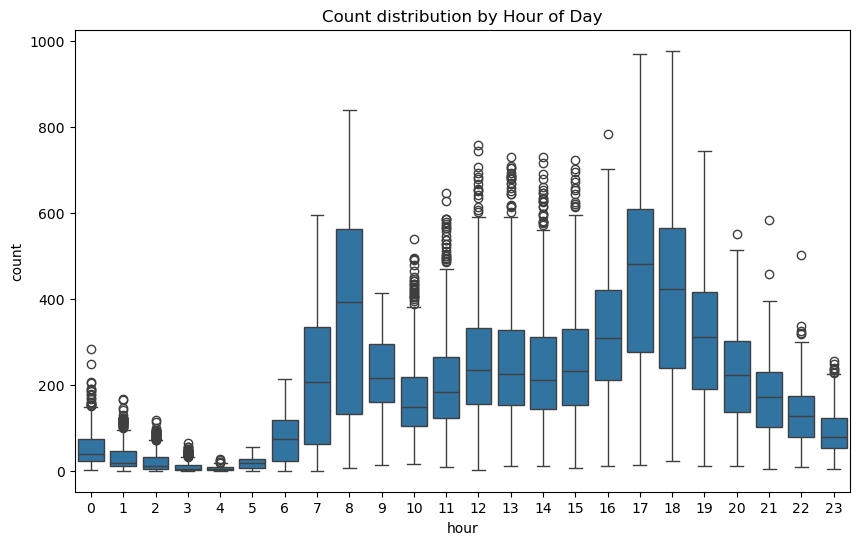

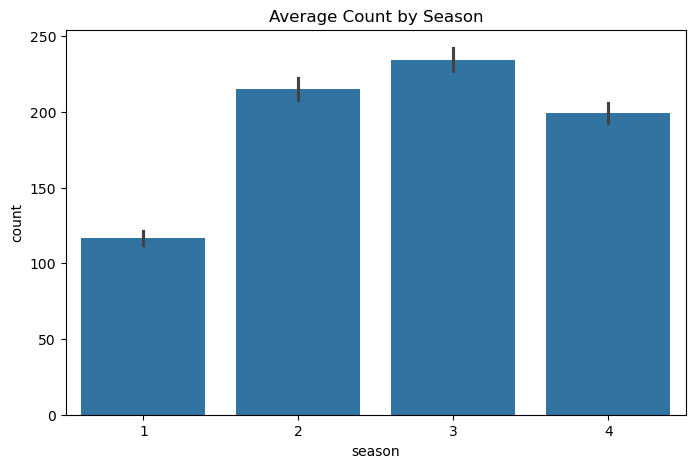

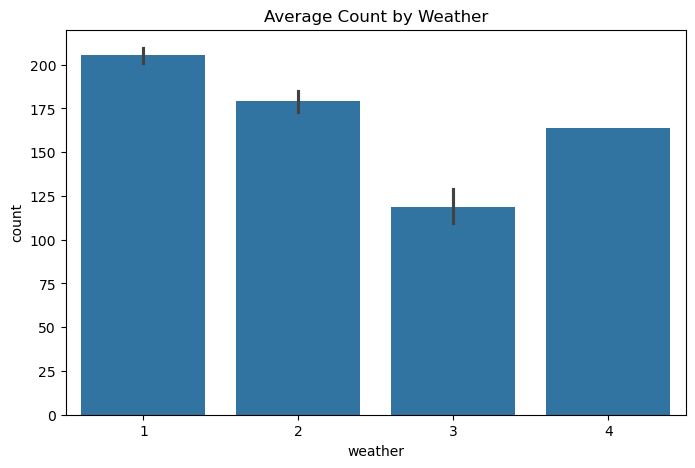

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'count' by hour of day
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='count', data=train)
plt.title('Count distribution by Hour of Day')
plt.show()

# Average count by season
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='count', data=train)
plt.title('Average Count by Season')
plt.show()

# Average count by weather condition
plt.figure(figsize=(8,5))
sns.barplot(x='weather', y='count', data=train)
plt.title('Average Count by Weather')
plt.show()


In [25]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

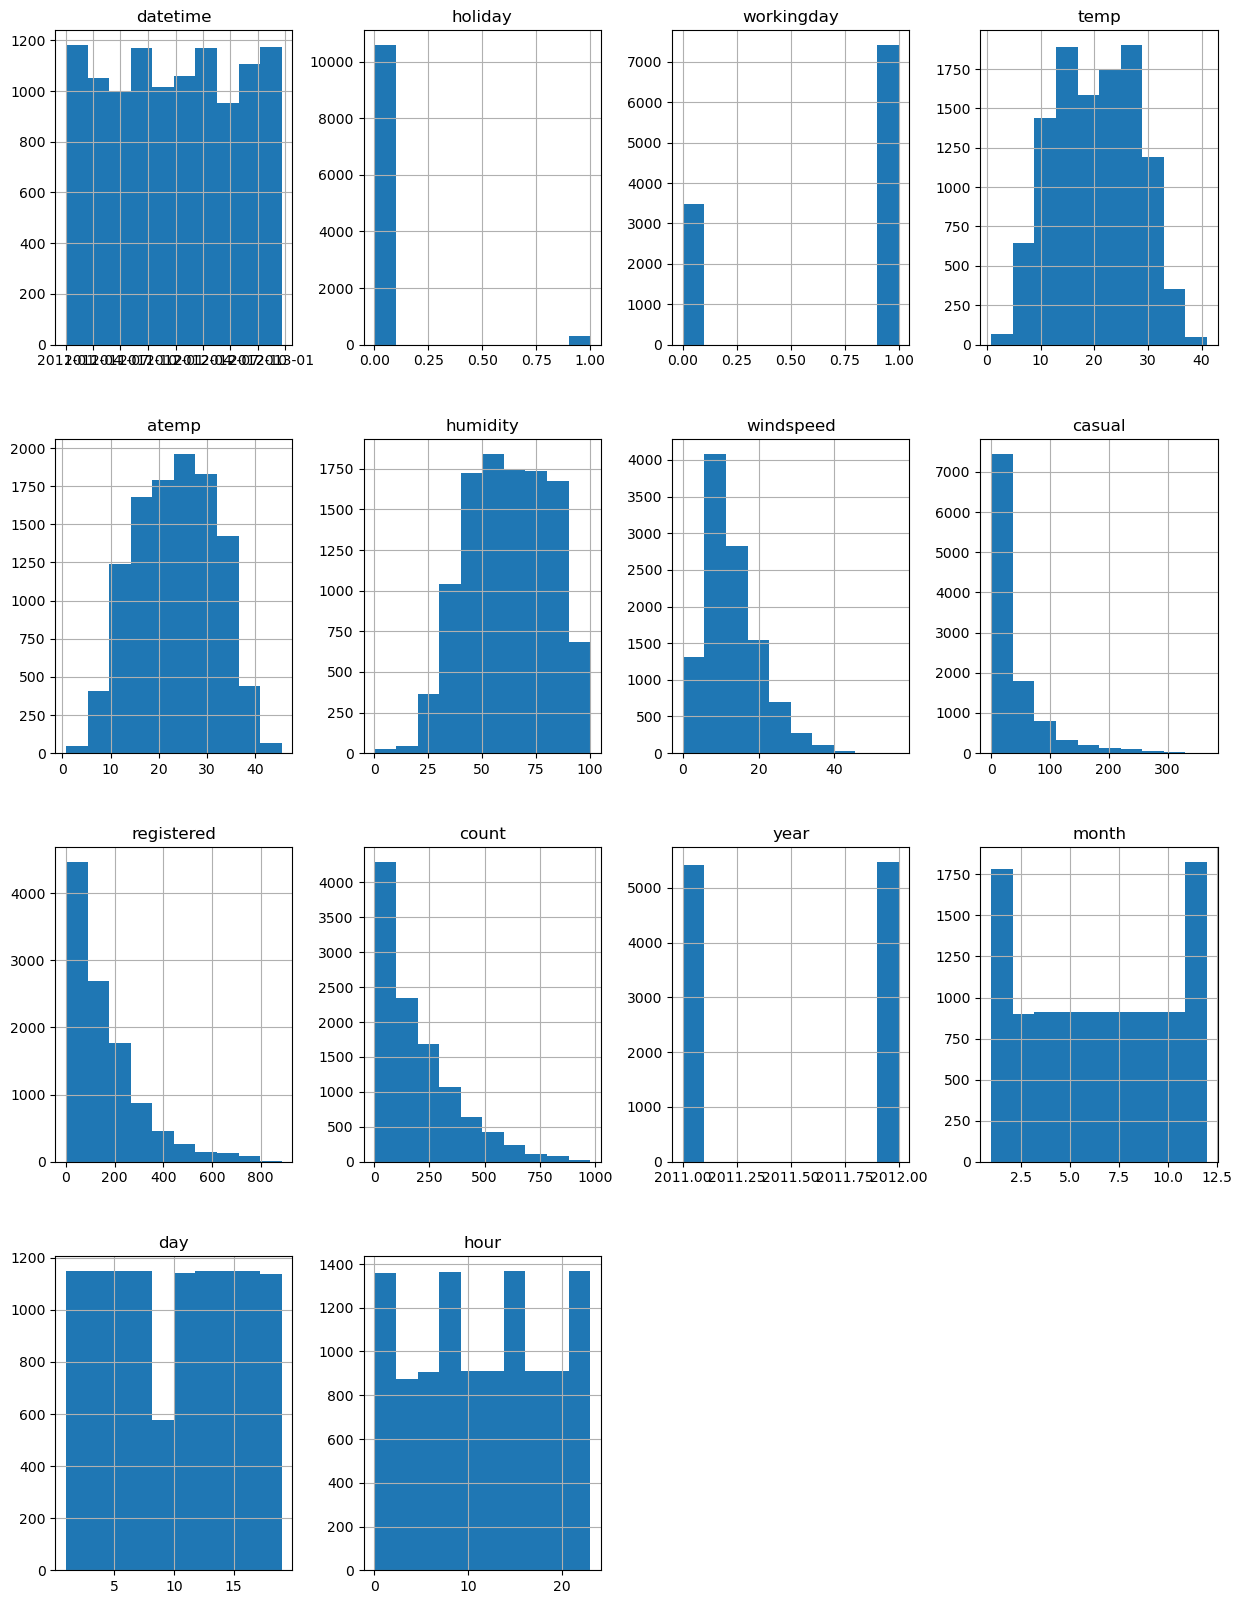

In [26]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))

## Step 5: Rerun the model with the same settings as before, just with more features

In [27]:
from autogluon.tabular import TabularPredictor

# Define variables
label = 'count'
ignored_columns = ['casual', 'registered']  # columns to ignore during training
eval_metric = 'root_mean_squared_error'
time_limit = 600  # seconds (10 minutes)
presets = 'best_quality'

# Train the AutoGluon model using the dataset with new datetime features
predictor_new_features = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric=eval_metric,
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250528_195103"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 19 16:54:57 UTC 2025
CPU Count:          2
Memory Avail:       1.32 GB / 3.76 GB (35.1%)
Disk Space Avail:   1.98 GB / 4.99 GB (39.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identi

In [28]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.361454  root_mean_squared_error      20.562106  413.166209                0.000828           0.050794            3       True         14
1          LightGBM_BAG_L2  -30.552336  root_mean_squared_error      19.002561  326.606349                0.308093          25.760163            2       True         11
2        LightGBMXT_BAG_L2  -31.186841  root_mean_squared_error      19.722374  331.488853                1.027906          30.642667            2       True         10
3          CatBoost_BAG_L2  -31.441945  root_mean_squared_error      18.845972  331.803220                0.151504          30.957035            2       True         13
4   RandomForestMSE_BAG_L2  -31.640914  root_mean_squared_error      19.073774  325.755550   

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.42

In [29]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
/opt/conda/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you t

0    15.236629
1     9.907646
2     9.056952
3     8.352371
4     7.366006
Name: count, dtype: float32

In [30]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictions_new_features.describe()

count    6493.000000
mean      163.374252
std       145.750076
min         2.659662
25%        48.850433
50%       125.729111
75%       234.168594
max       816.598572
Name: count, dtype: float64

In [35]:
# Remember to set all negative values to zero
# Count how many predictions are negative
pred_neg_count = (predictions_new_features < 0).sum()
pred_pos_count = (predictions_new_features >= 0).sum()

print("Total predictions                :", len(predictions_new_features))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)


Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [36]:
# Set negative predictions to zero
predictions[predictions_new_features < 0] = 0

# Verify no negative predictions remain
pred_neg_count = (predictions_new_features < 0).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")


No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [37]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [38]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 749kB/s]
Successfully submitted to Bike Sharing Demand

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-05-28 20:03:42.417000  new features          SubmissionStatus.COMPLETE  0.60928      0.60928       
submission.csv               2025-05-28 19:50:37.010000  first raw submission  SubmissionStatus.COMPLETE  1.79981      1.79981       
submission_new_features.csv  2025-05-28 17:26:40.900000  new features          SubmissionStatus.COMPLETE  0.61220      0.61220       
submission.csv               2025-05-28 16:59:07.100000  My new submission     SubmissionStatus.COMPLETE  1.79856      1.79856       


#### New Score of `0.60928`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [41]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment" 

In [42]:
from autogluon.tabular import TabularPredictor
from  autogluon.common.space import Real, Categorical, Int  # correct import for search spaces

# Define label and ignored columns
label = 'count'
ignored_columns = ['casual', 'registered', 'datetime']  # add datetime if you want to ignore it as feature
time_limit = 600
presets = "optimize_for_deployment"

# Neural network options for hyperparameter tuning
nn_options = {
    'num_epochs': 5,
    'learning_rate': Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': Real(0.0, 0.5, default=0.1),
}

# Gradient Boosting Machine options for hyperparameter tuning
gbm_options = [
    {
        'extra_trees': True,
        'num_boost_round': Int(lower=100, upper=500, default=100),
        'num_leaves': Int(lower=25, upper=64, default=36),
        'ag_args': {'name_suffix': 'XT'}
    },
    {},
    'GBMLarge'
]

# Combine all hyperparameters
hyperparameters = {
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
}

# Hyperparameter tuning kwargs
hyperparameter_tune_kwargs = {
    'num_trials': 20,
    'scheduler': 'local',
    'searcher': 'auto',
}

# Fit the model with HPO
predictor_new_hpo = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)


2025-05-28 20:08:57,442	INFO timeout.py:54 -- Reached timeout of 134.97734869122505 seconds. Stopping all trials.
2025-05-28 20:08:57,468	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_200412/models/NeuralNetTorch' in 0.0166s.
2025-05-28 20:08:57,952	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 14 trial(s):
- 32608f5d: FileNotFoundError('Could not fetch metrics for 32608f5d: both result.json and progress.csv were not found at /home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_200412/models/NeuralNetTorch/32608f5d')
- 2936acb4: FileNotFoundError('Could not fetch metrics for 2936acb4: both result.json and progress.csv were not found at /home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_200412/models/NeuralNetTorch/2936acb4')
- c34ef4a6: FileNotFoundError('Could not fetch metrics for c34ef

In [43]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -39.708945  root_mean_squared_error       1.125850  37.740511                0.000446           0.009841            2       True          5
1            LightGBMLarge -40.202893  root_mean_squared_error       0.161960   2.115743                0.161960           2.115743            1       True          4
2             LightGBM/T11 -40.575087  root_mean_squared_error       0.837917   4.947731                0.837917           4.947731            1       True          1
3  NeuralNetTorch/a89e94ed -67.345537  root_mean_squared_error       0.063090  14.083846                0.063090          14.083846            1       True          3
4  NeuralNetTorch/2936acb4 -68.765862  root_mean_squared_error       0.062437  16.583350               

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T11': 'LGBModel',
  'NeuralNetTorch/2936acb4': 'TabularNeuralNetTorchModel',
  'NeuralNetTorch/a89e94ed': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T11': -40.57508662992585,
  'NeuralNetTorch/2936acb4': -68.76586207175157,
  'NeuralNetTorch/a89e94ed': -67.34553662489233,
  'LightGBMLarge': -40.202893372816554,
  'WeightedEnsemble_L2': -39.70894536147369},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T11': ['LightGBM', 'T11'],
  'NeuralNetTorch/2936acb4': ['NeuralNetTorch', '2936acb4'],
  'NeuralNetTorch/a89e94ed': ['NeuralNetTorch', 'a89e94ed'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T11': 4.947730779647827,
  'NeuralNetTorch/2936acb4': 16.58335018157959,
  'NeuralNetTorch/a89e94ed': 14.083846092224121,
  'LightGBMLarge': 2.1157431602478027,
  'WeightedEnsemb

In [44]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.533018
1     2.507547
2    -0.088252
3     1.220988
4     1.399422
Name: count, dtype: float32

In [45]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo.describe()

count    6493.000000
mean      190.341003
std       169.951187
min        -9.535295
25%        47.948723
50%       151.564911
75%       285.949738
max       865.275024
Name: count, dtype: float64

In [46]:
# Remember to set all negative values to zero
# Count total predictions
total_preds = len(predictions_new_hpo)

# Count negative predictions
neg_mask = predictions_new_hpo < 0
neg_count = neg_mask.sum()
pos_count = total_preds - neg_count

print("Total predictions                :", total_preds)
print("Total positive prediction values :", pos_count)
print("Total negative prediction values :", neg_count)

# Replace negative values with 0
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

# Recheck for negative values
recheck_neg_count = (predictions_new_hpo < 0).sum()
print(f"No. of negative predictions after correction: {recheck_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

Total predictions                : 6493
Total positive prediction values : 6438
Total negative prediction values : 55
No. of negative predictions after correction: 0
All negative values in the predictions (if any) are set to zero successfully.


In [47]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [48]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [49]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 793kB/s]
Successfully submitted to Bike Sharing Demand

In [50]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                        status                     publicScore  privateScore  
---------------------------  --------------------------  ---------------------------------  -------------------------  -----------  ------------  
submission_new_hpo.csv       2025-05-28 20:10:56.590000  new features with hyperparameters  SubmissionStatus.COMPLETE  0.51331      0.51331       
submission_new_features.csv  2025-05-28 20:03:42.417000  new features                       SubmissionStatus.COMPLETE  0.60928      0.60928       
submission.csv               2025-05-28 19:50:37.010000  first raw submission               SubmissionStatus.COMPLETE  1.79981      1.79981       
submission_new_features.csv  2025-05-28 17:26:40.900000  new features                       SubmissionStatus.COMPLETE  0.61220      0.61220       


#### New Score of `0.51331`

In [60]:
# HPO2: Deep NN with lower learning rate range, different dropout range
nn_options_hpo2 = {
    'num_epochs': 10,
    'learning_rate': Real(1e-5, 5e-3, default=1e-3, log=True),
    'activation': Categorical('relu', 'tanh'),
    'dropout_prob': Real(0.1, 0.4, default=0.2),
}

gbm_options_hpo2 = [
    {
        'extra_trees': True,
        'num_boost_round': Int(lower=200, upper=600, default=200),
        'num_leaves': Int(lower=31, upper=100, default=50),
        'ag_args': {'name_suffix': 'XT2'}
    },
    {},
    'GBMLarge'
]

hyperparameters_hpo2 = {
    'GBM': gbm_options_hpo2,
    'NN_TORCH': nn_options_hpo2,
}

predictor_hpo2 = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters_hpo2,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)




2025-05-28 20:38:24,092	INFO timeout.py:54 -- Reached timeout of 134.97739498615266 seconds. Stopping all trials.
2025-05-28 20:38:24,119	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_203333/models/NeuralNetTorch' in 0.0186s.
2025-05-28 20:38:24,170	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 11 trial(s):
- b63dcb02: FileNotFoundError('Could not fetch metrics for b63dcb02: both result.json and progress.csv were not found at /home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_203333/models/NeuralNetTorch/b63dcb02')
- 0b0b9d34: FileNotFoundError('Could not fetch metrics for 0b0b9d34: both result.json and progress.csv were not found at /home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_203333/models/NeuralNetTorch/0b0b9d34')
- 3e85b697: FileNotFoundError('Could not fetch metrics for 3e85b

In [61]:
predictor_hpo2.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2 -39.817153  root_mean_squared_error       1.062234  28.176949                0.000469           0.010102            2       True          4
1            LightGBMLarge -40.202893  root_mean_squared_error       0.161995   2.277555                0.161995           2.277555            1       True          3
2             LightGBM/T11 -40.575087  root_mean_squared_error       0.853420   5.100471                0.853420           5.100471            1       True          1
3  NeuralNetTorch/0b0b9d34 -72.845978  root_mean_squared_error       0.046350  20.788820                0.046350          20.788820            1       True          2
Number of models trained: 4
Types of models trained:
{'TabularNeuralNetTorchModel', 'WeightedEnsembleMo

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T11': 'LGBModel',
  'NeuralNetTorch/0b0b9d34': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T11': -40.57508662992585,
  'NeuralNetTorch/0b0b9d34': -72.84597806273038,
  'LightGBMLarge': -40.202893372816554,
  'WeightedEnsemble_L2': -39.81715346105357},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T11': ['LightGBM', 'T11'],
  'NeuralNetTorch/0b0b9d34': ['NeuralNetTorch', '0b0b9d34'],
  'LightGBMLarge': ['LightGBMLarge'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T11': 5.100471258163452,
  'NeuralNetTorch/0b0b9d34': 20.788820266723633,
  'LightGBMLarge': 2.277555227279663,
  'WeightedEnsemble_L2': 0.010102272033691406},
 'model_pred_times': {'LightGBM/T11': 0.8534202575683594,
  'NeuralNetTorch/0b0b9d34': 0.04635000228881836,
  'LightGBMLarge': 0.16199541091918945,
  'WeightedEnsemble_L2': 0.000468730926

In [62]:
predictions_hpo2 = predictor_hpo2.predict(test)
predictions_hpo2.head()

0    18.190670
1     2.515054
2    -0.163538
3     1.254390
4     1.305693
Name: count, dtype: float32

In [63]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_hpo2.describe()

count    6493.000000
mean      192.430191
std       171.624985
min       -10.303040
25%        48.892868
50%       152.792175
75%       289.047089
max       873.632812
Name: count, dtype: float64

In [64]:
# Count total predictions
total_preds = len(predictions_hpo2)

# Count negative predictions
neg_mask = predictions_hpo2 < 0
neg_count = neg_mask.sum()
pos_count = total_preds - neg_count

print("Total predictions                :", total_preds)
print("Total positive prediction values :", pos_count)
print("Total negative prediction values :", neg_count)

# Replace negative values with 0
predictions_hpo2 = predictions_hpo2.clip(lower=0)

# Recheck for negative values
recheck_neg_count = (predictions_hpo2 < 0).sum()
print(f"No. of negative predictions after correction: {recheck_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

Total predictions                : 6493
Total positive prediction values : 6429
Total negative prediction values : 64
No. of negative predictions after correction: 0
All negative values in the predictions (if any) are set to zero successfully.


In [65]:
# Same thing as train and test dataset
submission_hpo2 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_hpo2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [66]:
# Same submitting predictions
submission_hpo2["count"] = predictions_hpo2
submission_hpo2.to_csv("submission_hpo2.csv", index=False)

In [67]:
!kaggle competitions submit -c bike-sharing-demand -f submission_hpo2.csv -m "new features with hyperparameters2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 712kB/s]
Successfully submitted to Bike Sharing Demand

In [68]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                         status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------  -------------------------  -----------  ------------  
submission_hpo2.csv          2025-05-28 20:43:09.630000  new features with hyperparameters2  SubmissionStatus.COMPLETE  0.52087      0.52087       
submission_new_hpo.csv       2025-05-28 20:10:56.590000  new features with hyperparameters   SubmissionStatus.COMPLETE  0.51331      0.51331       
submission_new_features.csv  2025-05-28 20:03:42.417000  new features                        SubmissionStatus.COMPLETE  0.60928      0.60928       
submission.csv               2025-05-28 19:50:37.010000  first raw submission                SubmissionStatus.COMPLETE  1.79981      1.79981       


In [69]:
# HPO3: Add CatBoost with fixed parameters and lighter boosting
nn_options_hpo3 = {
    'num_epochs': 7,
    'learning_rate': Real(5e-5, 1e-2, default=1e-3, log=True),
    'activation': Categorical('relu', 'softrelu'),
    'dropout_prob': Real(0.0, 0.3, default=0.1),
}

hyperparameters_hpo3 = {
    'GBM': [
        {
            'num_boost_round': Int(lower=50, upper=300, default=100),
            'num_leaves': Int(lower=20, upper=60, default=32),
            'ag_args': {'name_suffix': 'L'}
        },
        {}
    ],
    'NN_TORCH': nn_options_hpo3,
    'CAT': {
        'iterations': 300,
        'learning_rate': 0.03,
    }
}

predictor_hpo3 = TabularPredictor(
    label=label,
    problem_type='regression',
    eval_metric='root_mean_squared_error',
    learner_kwargs={'ignored_columns': ignored_columns}
).fit(
    train_data=train,
    time_limit=time_limit,
    presets=presets,
    hyperparameters=hyperparameters_hpo3,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    refit_full='best'
)

I0000 00:00:1748465297.161291     353 chttp2_transport.cc:1182] ipv4:169.255.255.2:46081: Got goaway [2] err=UNAVAILABLE:GOAWAY received; Error code: 2; Debug Text: Cancelling all calls {created_time:"2025-05-28T20:48:17.160208447+00:00", http2_error:2, grpc_status:14}
2025-05-28 20:50:28,443	INFO timeout.py:54 -- Reached timeout of 134.97575615644456 seconds. Stopping all trials.
2025-05-28 20:50:28,471	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_204502/models/NeuralNetTorch' in 0.0193s.
2025-05-28 20:50:29,206	WARNING experiment_analysis.py:180 -- Failed to fetch metrics for 15 trial(s):
- 4eeb963d: FileNotFoundError('Could not fetch metrics for 4eeb963d: both result.json and progress.csv were not found at /home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20250528_204502/models/NeuralNetTorch/4eeb963d')
- 225c056c: FileNotFoundError('Coul

In [70]:
predictor_hpo3.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L2 -40.214304  root_mean_squared_error       4.290379  21.212320                0.000531           0.013535            2       True          4
1         LightGBM/T11 -40.575087  root_mean_squared_error       0.833060   5.006760                0.833060           5.006760            1       True          2
2          LightGBM/T4 -40.791661  root_mean_squared_error       3.452822  13.165698                3.452822          13.165698            1       True          1
3         CatBoost/T20 -45.433800  root_mean_squared_error       0.003966   3.026328                0.003966           3.026328            1       True          3
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'LGBModel', 'CatBoostModel'}
Bagging used: F

/opt/conda/lib/python3.12/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM/T4': 'LGBModel',
  'LightGBM/T11': 'LGBModel',
  'CatBoost/T20': 'CatBoostModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM/T4': -40.791661153824954,
  'LightGBM/T11': -40.57508662992585,
  'CatBoost/T20': -45.43379982774535,
  'WeightedEnsemble_L2': -40.214304017980545},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBM/T4': ['LightGBM', 'T4'],
  'LightGBM/T11': ['LightGBM', 'T11'],
  'CatBoost/T20': ['CatBoost', 'T20'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2']},
 'model_fit_times': {'LightGBM/T4': 13.165698289871216,
  'LightGBM/T11': 5.0067596435546875,
  'CatBoost/T20': 3.026327610015869,
  'WeightedEnsemble_L2': 0.013534784317016602},
 'model_pred_times': {'LightGBM/T4': 3.452821969985962,
  'LightGBM/T11': 0.8330597877502441,
  'CatBoost/T20': 0.003966093063354492,
  'WeightedEnsemble_L2': 0.0005307197570800781},
 'num_bag_folds': 0,
 'max_stack_level': 2,
 'model_hyperparams': {'LightGBM/

In [72]:
predictions_hpo3 = predictor_hpo3.predict(test)
predictions_hpo3.head()

0    14.879901
1     0.439658
2    -1.887907
3     1.513284
4     1.707826
Name: count, dtype: float32

In [73]:
predictions_hpo3.describe()

count    6493.000000
mean      192.415955
std       172.020309
min       -12.934388
25%        49.340015
50%       150.575180
75%       288.546844
max       866.158264
Name: count, dtype: float64

In [74]:
# Count total predictions
total_preds = len(predictions_hpo3)

# Count negative predictions
neg_mask = predictions_hpo3 < 0
neg_count = neg_mask.sum()
pos_count = total_preds - neg_count

print("Total predictions                :", total_preds)
print("Total positive prediction values :", pos_count)
print("Total negative prediction values :", neg_count)

# Replace negative values with 0
predictions_hpo3 = predictions_hpo3.clip(lower=0)

# Recheck for negative values
recheck_neg_count = (predictions_hpo3 < 0).sum()
print(f"No. of negative predictions after correction: {recheck_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

Total predictions                : 6493
Total positive prediction values : 6409
Total negative prediction values : 84
No. of negative predictions after correction: 0
All negative values in the predictions (if any) are set to zero successfully.


In [75]:
# Same thing as train and test dataset
submission_hpo3 = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_hpo3.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [76]:
!kaggle competitions submit -c bike-sharing-demand -f submission_hpo2.csv -m "new features with hyperparameters3"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 778kB/s]
Successfully submitted to Bike Sharing Demand

In [77]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                        description                         status                     publicScore  privateScore  
---------------------------  --------------------------  ----------------------------------  -------------------------  -----------  ------------  
submission_hpo2.csv          2025-05-28 20:52:01.110000  new features with hyperparameters3  SubmissionStatus.COMPLETE  0.52087      0.52087       
submission_hpo2.csv          2025-05-28 20:43:09.630000  new features with hyperparameters2  SubmissionStatus.COMPLETE  0.52087      0.52087       
submission_new_hpo.csv       2025-05-28 20:10:56.590000  new features with hyperparameters   SubmissionStatus.COMPLETE  0.51331      0.51331       
submission_new_features.csv  2025-05-28 20:03:42.417000  new features                        SubmissionStatus.COMPLETE  0.60928      0.60928       


## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

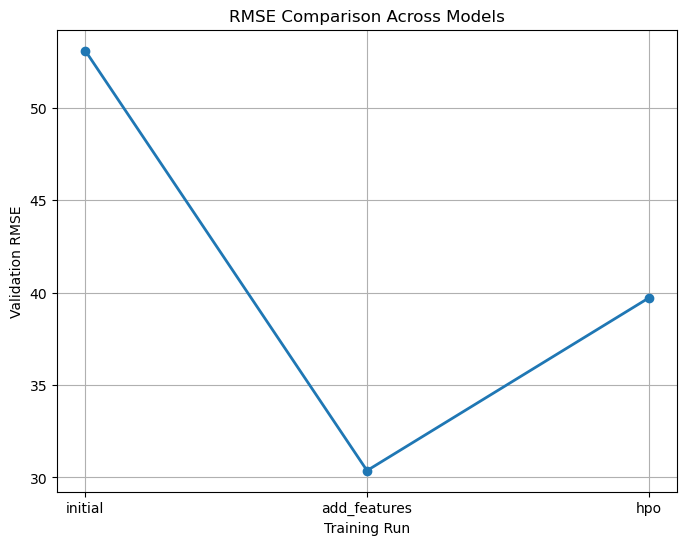

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Get RMSEs from leaderboard (convert from negative to positive)
rmse_scores = [
    -predictor.leaderboard(silent=True).loc[0, 'score_val'],
    -predictor_new_features.leaderboard(silent=True).loc[0, 'score_val'],
    -predictor_new_hpo.leaderboard(silent=True).loc[0, 'score_val']
]

# Create DataFrame
rmse_df = pd.DataFrame({
    'model': ['initial', 'add_features', 'hpo'],
    'rmse': rmse_scores
})

# Plot
plt.figure(figsize=(8,6))
plt.plot(rmse_df['model'], rmse_df['rmse'], marker='o', linewidth=2)
plt.title('RMSE Comparison Across Models')
plt.xlabel('Training Run')
plt.ylabel('Validation RMSE')
plt.grid(True)
plt.savefig('rmse_comparison.png')
plt.show()


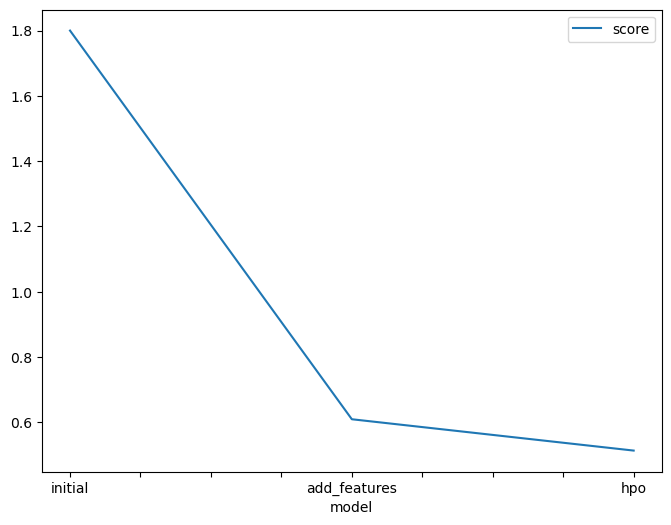

In [78]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.79981, 0.60928, 0.51331]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

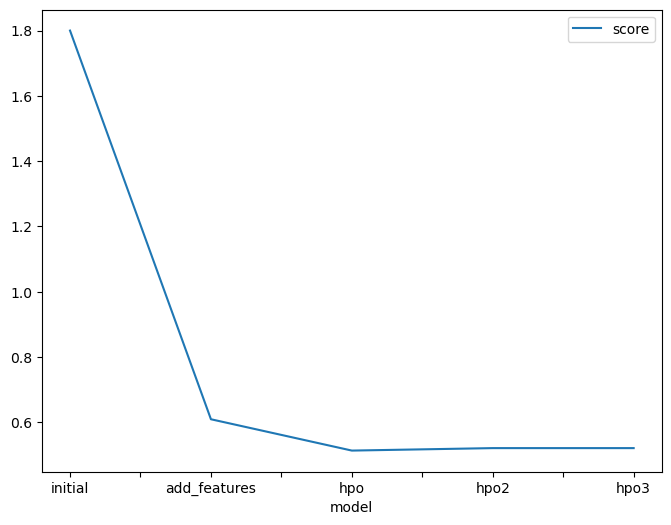

In [79]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo","hpo2","hpo3"],
        "score": [1.79981, 0.60928, 0.51331,0.52087,0.52087]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

### Hyperparameter table

In [80]:
# The 3 hyperparameters we tuned with the kaggle score as the result
df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    
    # You can describe features or default values used at each stage
    "hpo1 (learning_rate)": ["-", "-", 0.0005],
    "hpo2 (activation)": ["-", "-", "relu"],
    "hpo3 (dropout_prob)": ["-", "-", 0.1],

    # Kaggle RMSE scores
    "score": [1.79981, 0.60928, 0.51331]
})


In [81]:
df

,model,hpo1 (learning_rate),hpo2 (activation),hpo3 (dropout_prob),score
0,initial,-,-,-,1.79981
1,add_features,-,-,-,0.60928
2,hpo,0.0005,relu,0.1,0.51331
